In [161]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [162]:
df = pd.read_csv('ex2data1.txt', header= None)
df.columns = ['exam1', 'exam2', 'admitted']

In [163]:
a = df.loc[df['admitted'] == 0]
b = df.loc[df['admitted'] == 1]

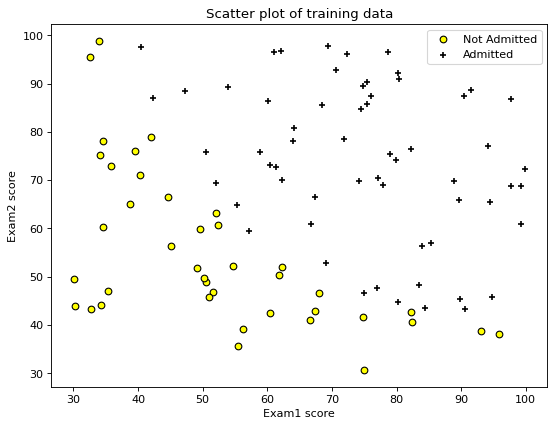

In [164]:
plt.figure(figsize=(8, 6), dpi = 80)
plt.scatter(a.iloc[:,0], a.iloc[:,1], edgecolors='black', color='yellow', marker= 'o', label='Not Admitted')
plt.scatter(b.iloc[:,0], b.iloc[:,1],color='black', marker= '+', label='Admitted')
plt.title('Scatter plot of training data')
plt.xlabel('Exam1 score')
plt.ylabel('Exam2 score')
plt.legend()
plt.show()

In [165]:
x = df.iloc[:, 0:len(df.columns)-1]
y = df.iloc[:, len(df.columns)-1:len(df.columns)]
m = len(y)
a = np.ones(m)
X = np.column_stack((a,x))

In [166]:
def sigmoid(z):
    g = 1 / (1 + np.exp(-z))
    return g   

def hyp(X, theta):
    s = sigmoid(np.dot(X,theta.T))
    s = s.reshape(100, 1)
    return s

def CostFunction(X, y ,theta):
    J = (1/m) * np.sum((-y.T.dot(np.log(hyp(X, theta)))) - ((1-y).T.dot((np.log(1-hyp(X, theta))))))
    return J

theta = np.zeros(3)
J = CostFunction(X, y, theta)
print(J)

0    0.693147
dtype: float64


In [167]:
def gradient_descent(iterations, alpha):
    theta = np.zeros(3)
    J = []
    for i in range(iterations):
        theta = theta - (alpha * (1/m) * (np.dot((hyp(X, theta) - y).T, X)))
        J.append(CostFunction(X, y, theta))
    return J, theta

iterations = 1000000
alpha = 0.004
J, theta_vectorized = gradient_descent(iterations, alpha)
theta_vectorized

array([[-24.70893517,   0.20261325,   0.19781088]])

Text(0, 0.5, 'exam2 score')

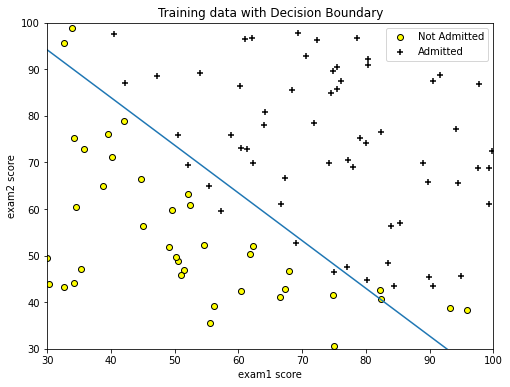

In [169]:
import matplotlib.pyplot as plt

X_train = df.iloc[:, 0:len(df.columns)-1].copy().to_numpy()
y_train = df.iloc[:, len(df.columns)-1:len(df.columns)].copy().to_numpy()

c0 = c1 = 0
for i in range(0, 100):
    if y_train[i][0] == 1:
        c1 = c1 + 1
    else:
        c0 = c0 + 1
        
zeros = np.ones((c0,2)) 
ones = np.ones((c1,2)) 

p0 = p1 = 0
for i in range(1,100):
    if y_train[i][0] == 0:
        zeros[p0] = X_train[i]
        p0 = p0 + 1
    else:
        ones[p1] = X_train[i]
        p1 = p1 + 1
  
X = [zeros, ones]
colors = ["yellow", "black"]
theta = theta_vectorized.reshape(3)

data = np.array([min(X_train[:,0]) - 2, max(X_train[:,0]) + 2])
decision_boundary = (-1/theta[2]) * (theta[1] * data + theta[0])

for x, c in zip(X, colors):
    if c == "yellow":
        plt.scatter(x[:,0], x[:,1], color = c, marker='o', edgecolors='black', label = "Not Admitted")
    else:
        plt.scatter(x[:,0], x[:,1], color = c, marker='+', label = "Admitted")

plt.rcParams["figure.figsize"] = [8,6]
plt.plot(data, decision_boundary)
plt.ylim(30, 100)
plt.xlim(30, 100)
plt.title("Training data with Decision Boundary")
plt.legend()

plt.xlabel("exam1 score")
plt.ylabel("exam2 score")